# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### ImportError: 
### `load_boston` has been removed from scikit-learn since version 1.2.
#### [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset?resource=download)  para baixar csv.

In [2]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# ImportError: 
# `load_boston` has been removed from scikit-learn since version 1.2.
#boston = datasets.load_boston()

boston = pd.read_csv('../../../../Datasets/HousingData.csv', sep = ',')

# separando dataframe

In [3]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
# dropping na
boston.dropna(inplace=True)

In [5]:

X = boston.drop(columns='MEDV')
y = boston['MEDV']

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [8]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
y.dtypes

dtype('float64')

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<Axes: >

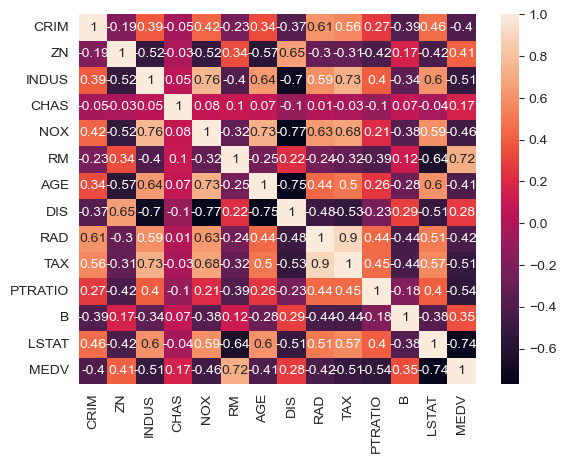

In [10]:
# matriz de correlação
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Sim temos duas muito fortes, LSTAT e RM. e outras com correlação moderada, maior que 0.4, TAX, INDUS, PTRATIO, NOX, CRIM, ZN, AGE, RAD, DIS. Mas isso não vêm tanto ao caso porquê vamos usar uma árvore de decisão, que é capaz de capturar relações não lineares entre as variáveis.

### 3. Separe os dados em validação e teste

In [11]:
# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
# importando a árvore de regressão
from sklearn.tree import DecisionTreeRegressor

# instanciando a árvore
tree_8 = DecisionTreeRegressor(max_depth=8)
tree_2 = DecisionTreeRegressor(max_depth=2)

# treinando a árvore
tree_8.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

    ### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
# calculando o mse
from sklearn.metrics import mean_squared_error

# prevendo os valores
y_pred_train_8 = tree_8.predict(X_train)
y_pred_test_8 = tree_8.predict(X_test)  

y_pred_train_2 = tree_2.predict(X_train)
y_pred_test_2 = tree_2.predict(X_test)

# calculando o mse
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)

mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

print(f'MSE treino profundidade 8: {mse_train_8}')
print(f'MSE teste profundidade 8: {mse_test_8}')
print(f'MSE treino profundidade 2: {mse_train_2}')
print(f'MSE teste profundidade 2: {mse_test_2}')

MSE treino profundidade 8: 1.2385777113209373
MSE teste profundidade 8: 30.49721784038218
MSE treino profundidade 2: 18.85771016615594
MSE teste profundidade 2: 34.56644267999564


R2

In [14]:
from sklearn.metrics import r2_score

r2_train_8 = r2_score(y_train, y_pred_train_8)
r2_test_8 = r2_score(y_test, y_pred_test_8)

r2_train_2 = r2_score(y_train, y_pred_train_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)

print(f'R2 treino profundidade 8: {r2_train_8}')
print(f'R2 teste profundidade 8: {r2_test_8}')
print(f'R2 treino profundidade 2: {r2_train_2}')
print(f'R2 teste profundidade 2: {r2_test_2}')


R2 treino profundidade 8: 0.9841835408540943
R2 teste profundidade 8: 0.6730827664350094
R2 treino profundidade 2: 0.7591897547468054
R2 teste profundidade 2: 0.6294624029552007


Podemos ver que o R2 apresenta o mesmo comportamento do MSE

    ### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 parece ser a mais adequada, pois ela apresenta um erro menor na base de teste. A árvore com profundidade 2 têm performance similar mais um pouco pior que a árvore com profundidade 8 na base de teste.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

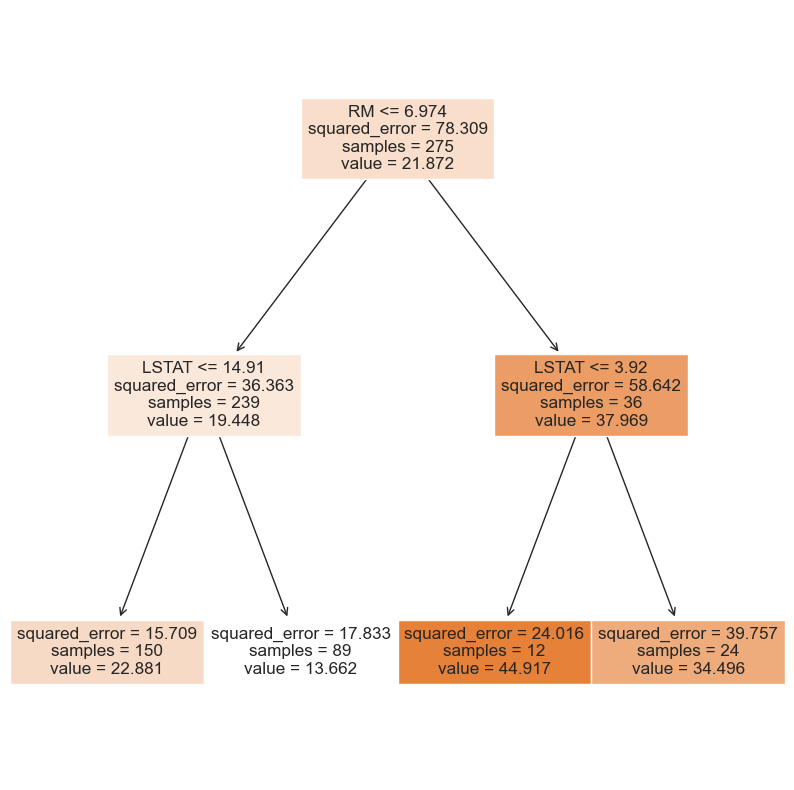

In [24]:
# visualizando a árvore de maneira convencional
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(10, 10))
tree.plot_tree(tree_2, filled=True, feature_names=X.columns.tolist())
plt.show()


Pelo observado na árvore, a variável mais importante é o RM, que é o número médio de quartos por habitação. A árvore de decisão escolheu essa variável para fazer a primeira divisão, o que indica que ela é a variável mais importante para a árvore. Embora o LSTAT seja a variável com maior correlação com a variável resposta, a árvore de decisão escolheu o RM como a variável mais importante!